In [10]:
import os
import fluidsynth
import time

# Set up FluidSynth path (if needed)
fluidsynth_bin_path = r"C:\tools\fluidsynth\bin"
if os.path.exists(fluidsynth_bin_path):
    os.add_dll_directory(fluidsynth_bin_path)

# Initialize FluidSynth
fs = fluidsynth.Synth()
fs.start(driver="dsound")  # Use DirectSound for Windows

# Load a SoundFont (.sf2 file)
soundfont_path = r"C:\tools\fluidsynth\MuseScore_General.sf2"  # Replace with the actual file path
if not os.path.exists(soundfont_path):
    raise FileNotFoundError(f"SoundFont not found: {soundfont_path}")

sfid = fs.sfload(soundfont_path)
fs.program_select(0, sfid, 0, 0)  # Select Piano (Bank 0, Preset 0)

# Define "Für Elise" melody (right hand) & chords (left hand)
fur_elise_melody = [
    76, 75, 76, 75, 76, 71, 74, 72, 69, 69, 69, 72, 76, 79, 81, 76, 79, 74, 77, 72, 75, 69, 72
]
fur_elise_chords = [
    (52, 56, 59), (52, 57, 60), (52, 56, 59), (52, 57, 60),  # Alternating chords
    (52, 56, 59), (52, 57, 60), (52, 56, 59), (52, 57, 60),
    (48, 52, 55), (47, 50, 54), (48, 52, 55), (47, 50, 54),
    (48, 52, 55), (47, 50, 54), (48, 52, 55), (47, 50, 54)
]

tempo = 100  # BPM (Für Elise is around 100 BPM)

# Play Für Elise melody and chords together
for i, note in enumerate(fur_elise_melody):
    # Play left-hand chord (loop back if needed)
    chord = fur_elise_chords[i % len(fur_elise_chords)]
    for chord_note in chord:
        fs.noteon(0, chord_note, 80)  # Play chord

    # Play right-hand melody
    fs.noteon(0, note, 100)
    time.sleep(60 / tempo)  # Convert BPM to time delay
    fs.noteoff(0, note)

    # Stop left-hand chord notes
    for chord_note in chord:
        fs.noteoff(0, chord_note)

# Stop FluidSynth
fs.delete()


In [16]:
#x=[1,2,4,6,8,10,12,14,16,18,20]
#y=[0.6,0.9,1.5,1.9,2.1,2.6,2.9,3.7,3.5,3.7,3.8]
x = [1.6,9.4,15.5,20,22,35.5,43,40.5,33]
y = [240,181,193,155,172,110,113,75,94]

n = len(x)

def avg(a):
    sum=0
    for num in a:
        sum+=num
    avg = sum/n
    return avg

avg_x = avg(x)
avg_y = avg(y)

b_1_upper = 0
for i in range(len(x)):
    b_1_upper += (x[i]-avg_x)*(y[i]-avg_y)

b_1_lower = 0
for num_x in x:
    b_1_lower += (num_x-avg_x)**2

b_1 = b_1_upper/b_1_lower

print("b1: ",b_1_upper,b_1_lower,b_1)

b_0 = avg_y-(b_1*avg_x)
print("b0:",b_0)

def model(x):
    y_pred = b_0+b_1*(x)
    return y_pred
print(model(15))

avg_y_pred = 0.0
for num in x:
    y_pred = model(num+3)
    avg_y_pred += y_pred
avg_y_pred = avg_y_pred/n
print("avg_y_pred",avg_y_pred)

print(model(6))

ssr = 0
for i in x:
    ssr += (model(i)-avg_y)**2

sst = 0
for i in y:    
    sst += (i-avg_y)**2

R_square = ssr/sst
print(ssr,sst,R_square)

b1:  -5794.099999999999 1651.42 -3.508556272783422
b0: 234.07073979430496
181.44239570255363
avg_y_pred 137.58544229276083
213.01940215760442
20328.925900134418 23116.88888888889 0.8793971367793136


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Nienta PC\AppData\Local\Temp\ipykernel_13404\638473786.py:6: SyntaxWarning: invalid escape sequence '\p'
  image = cv2.imread('Happy_birth_day\page_1.png', cv2.IMREAD_GRAYSCALE)


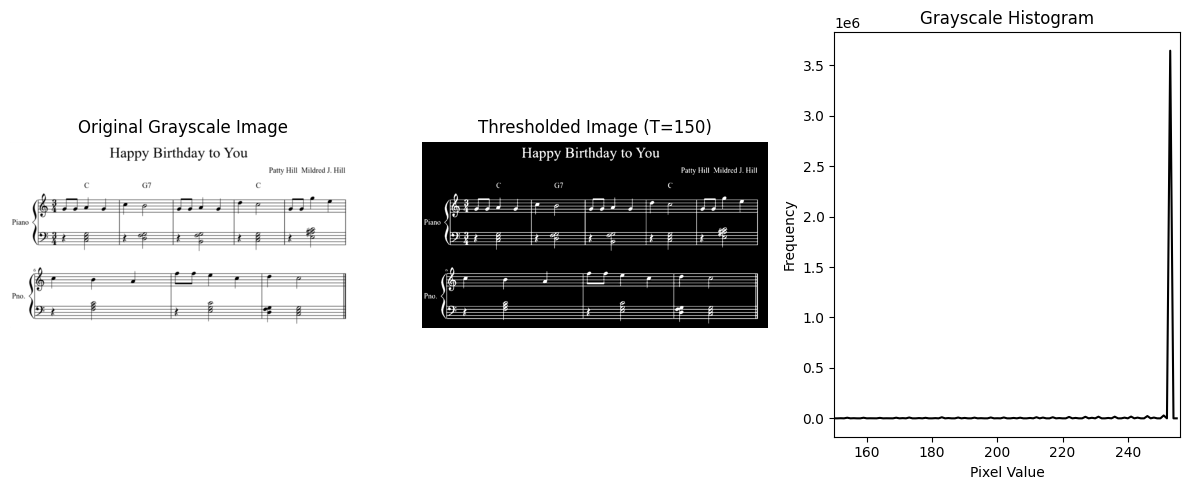

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('Happy_birth_day\page_1.png', cv2.IMREAD_GRAYSCALE)

# Apply a threshold
threshold_value = 150  # Adjust based on your needs
_, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Calculate histogram of the original grayscale image
hist = cv2.calcHist([image], [0], None, [256], [150, 256])

# Display the original image, thresholded image, and histogram
plt.figure(figsize=(12, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Thresholded Image
plt.subplot(1, 3, 2)
plt.imshow(thresholded, cmap='gray')
plt.title(f"Thresholded Image (T={threshold_value})")
plt.axis("off")

# Histogram
plt.subplot(1, 3, 3)
plt.plot(hist, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([150, 256])

plt.tight_layout()
plt.show()


(-0.5, 2900.5, 1559.5, -0.5)

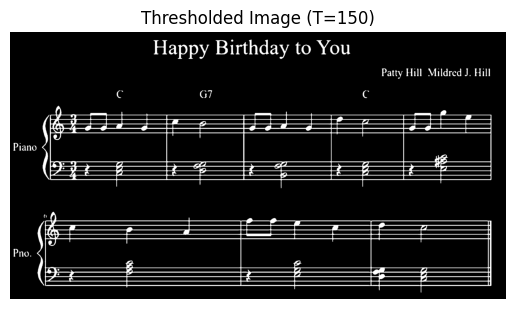

In [11]:
plt.imshow(thresholded, cmap='gray')
plt.title(f"Thresholded Image (T={threshold_value})")
plt.axis("off")

In [12]:
img = cv2.imread("Twinkle_Twinkle_Little_Star\page_1.png")
print(img.shape)

(3300, 2550, 3)


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Nienta PC\AppData\Local\Temp\ipykernel_13404\3553454924.py:1: SyntaxWarning: invalid escape sequence '\p'
  img = cv2.imread("Twinkle_Twinkle_Little_Star\page_1.png")


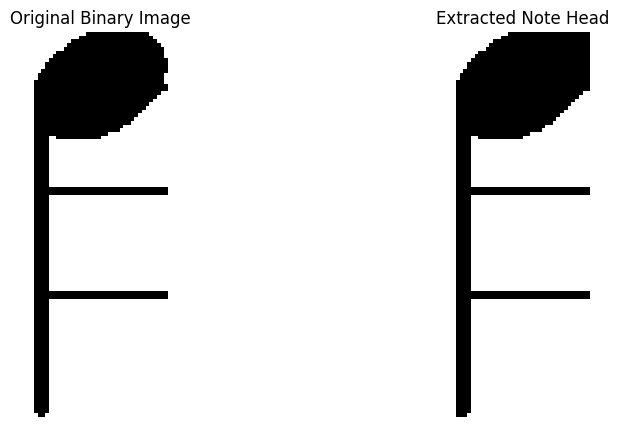

In [15]:
import cv2

# Load the image
image_path = "Template/Unlabeled_Template/template1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours of all elements
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter based on aspect ratio and area (to detect note head)
note_head_contours = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    
    # Conditions to filter out stems (usually tall and thin)
    if 0.7 < aspect_ratio < 1.5 and cv2.contourArea(cnt) > 50:  # Aspect ratio for note head
        note_head_contours.append(cnt)

# Create a blank mask to extract only the note head
note_head_mask = np.zeros_like(binary)
cv2.drawContours(note_head_mask, note_head_contours, -1, (255), thickness=cv2.FILLED)

# Extract only the note head
note_head_only = cv2.bitwise_and(binary, note_head_mask)

# Display results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(binary, cmap='gray')
axs[0].set_title("Original Binary Image")
axs[0].axis("off")

axs[1].imshow(note_head_only, cmap='gray')
axs[1].set_title("Extracted Note Head")
axs[1].axis("off")

plt.show()

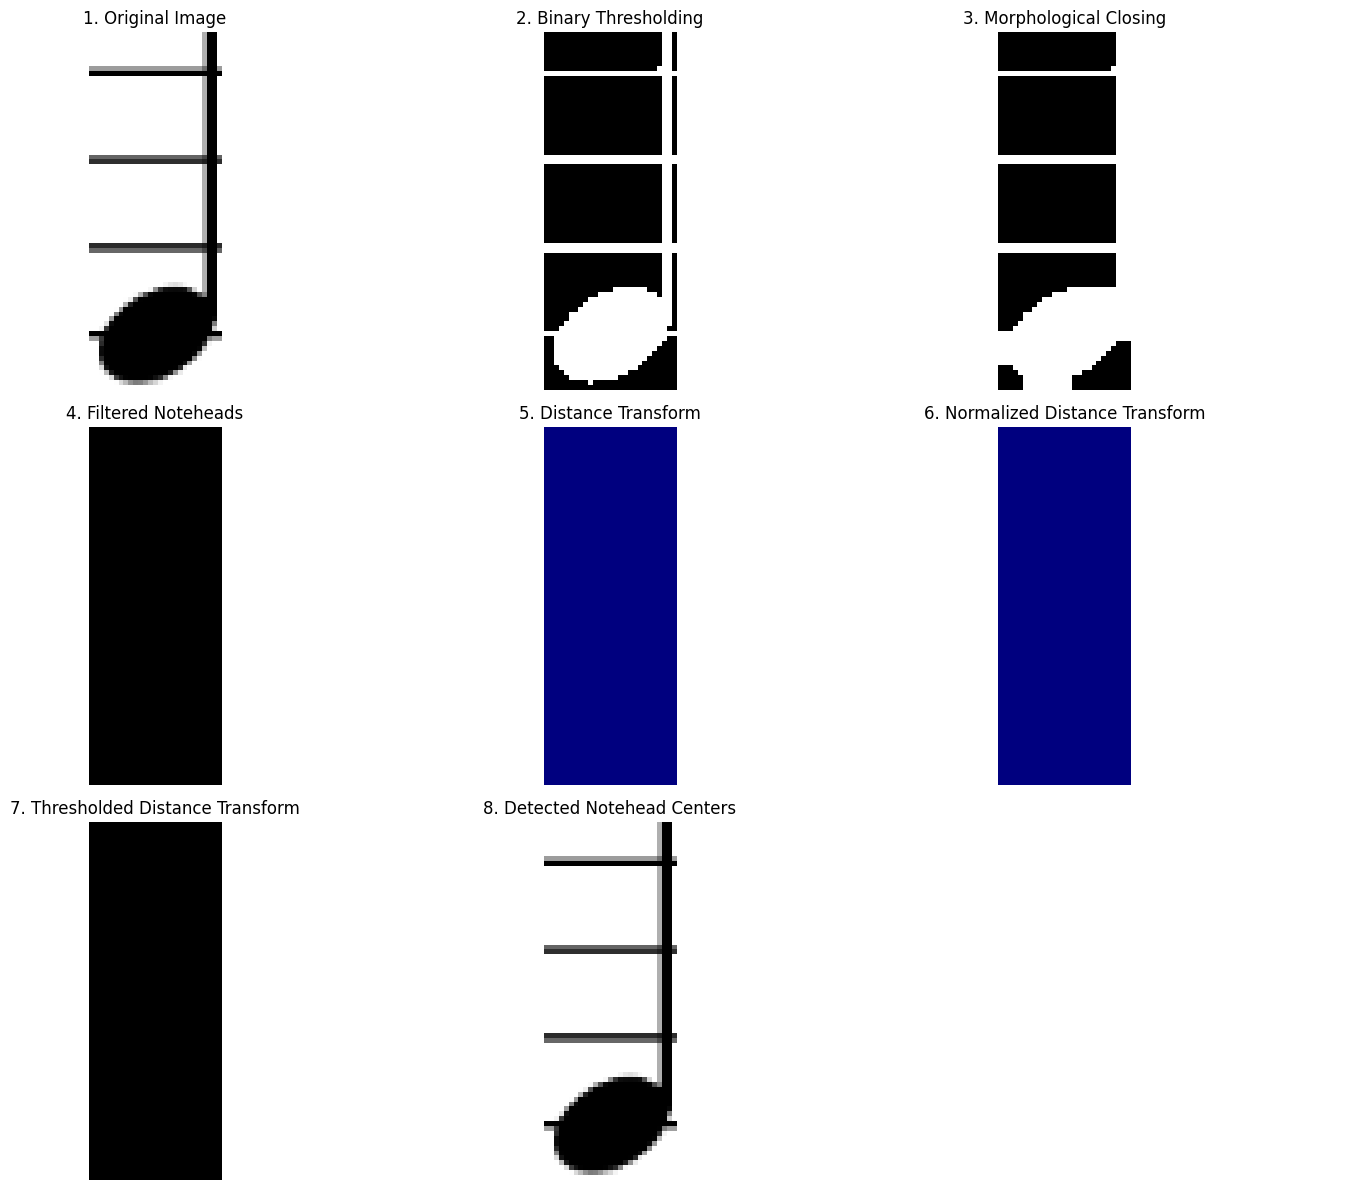

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_steps(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 1: Binary Thresholding (Highlight Black Areas)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # Step 2: Morphological Closing (Remove Small Gaps)
    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Step 3: Find Contours of Possible Noteheads
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Filter Contours Based on Shape (Oval/Circular)
    noteheads_mask = np.zeros_like(binary_image)
    min_area = 10  # Minimum notehead size
    max_area = 500  # Maximum reasonable notehead size

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)

        if min_area < area < max_area and 0.5 < aspect_ratio < 2.0:
            cv2.drawContours(noteheads_mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Step 5: Apply Distance Transform
    distance_transform = cv2.distanceTransform(noteheads_mask, cv2.DIST_L2, 5)
    normalized_dist = cv2.normalize(distance_transform, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 6: Thresholding the Distance Transform to Find Peaks (Centers)
    _, notehead_centers = cv2.threshold(normalized_dist, 0.7 * normalized_dist.max(), 255, cv2.THRESH_BINARY)

    # Step 7: Find Contours for Center Detection
    contours, _ = cv2.findContours(notehead_centers, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw center points on the original image
    centered_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(centered_image, (cx, cy), 3, (0, 0, 255), -1)  # Red dot for center

    # Step 8: Visualize Every Step
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title("1. Original Image")

    axes[0, 1].imshow(binary_image, cmap='gray')
    axes[0, 1].set_title("2. Binary Thresholding")

    axes[0, 2].imshow(cleaned_image, cmap='gray')
    axes[0, 2].set_title("3. Morphological Closing")

    axes[1, 0].imshow(noteheads_mask, cmap='gray')
    axes[1, 0].set_title("4. Filtered Noteheads")

    axes[1, 1].imshow(distance_transform, cmap='jet')
    axes[1, 1].set_title("5. Distance Transform")

    axes[1, 2].imshow(normalized_dist, cmap='jet')
    axes[1, 2].set_title("6. Normalized Distance Transform")

    axes[2, 0].imshow(notehead_centers, cmap='gray')
    axes[2, 0].set_title("7. Thresholded Distance Transform")

    axes[2, 1].imshow(centered_image, cmap='gray')
    axes[2, 1].set_title("8. Detected Notehead Centers")

    # Hide last empty subplot
    axes[2, 2].axis('off')

    for ax in axes.ravel():
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Provide the image path and visualize the steps
visualize_steps(r"Template\Twinkle_Twinkle_Little_Star\Unlabeled_Template\BH.png")


In [ ]:
# Re-load necessary libraries since the execution state was reset
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reload the uploaded image
image_path = r"Template\Twinkle_Twinkle_Little_Star\Unlabeled_Template\BH.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply binary thresholding to highlight dark regions (noteheads)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Step 2: Morphological operations to remove thin staff lines and connect close noteheads
kernel = np.ones((3, 3), np.uint8)
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)

# Step 3: Find contours
contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Filter contours based on shape (detecting oval/circular noteheads)
noteheads_mask = np.zeros_like(binary_image)
min_area = 10  # Minimum area to filter small noise
max_area = 500  # Maximum reasonable notehead size

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(contour)

    # Filtering based on area and aspect ratio (noteheads are typically oval/circular)
    if min_area < area < max_area and 0.5 < aspect_ratio < 2.0:
        cv2.drawContours(noteheads_mask, [contour], -1, 255, thickness=cv2.FILLED)

# Apply Distance Transform to detect the center of noteheads
distance_transform = cv2.distanceTransform(noteheads_mask, cv2.DIST_L2, 5)

# Normalize the distance transform image for better visualization
normalized_dist = cv2.normalize(distance_transform, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Threshold the distance transform to get only the center points of noteheads
_, notehead_centers = cv2.threshold(normalized_dist, 0.7 * normalized_dist.max(), 255, cv2.THRESH_BINARY)

# Convert centers to contours to find exact locations
contours, _ = cv2.findContours(notehead_centers, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw center points on the original image
centered_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Avoid division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(centered_image, (cx, cy), 3, (0, 0, 255), -1)  # Red dot for center

# Save and display the detected notehead centers
notehead_centers_path = "/mnt/data/detected_notehead_centers.png"
cv2.imwrite(notehead_centers_path, centered_image)

# Show the detected notehead centers
plt.figure(figsize=(6, 6))
plt.title("Detected Notehead Centers")
plt.imshow(centered_image, cmap='gray')
plt.axis('off')
plt.show()

# Return the processed image path
notehead_centers_path


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'cv::morphologyEx'
